In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier,BaggingClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import CalibratedClassifierCV
import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The following columns are redundant and can be dropped : Rownumber, CustomerId, Surname

In [4]:
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No null values are seen in the dataset

In [7]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
data[['Gender','Geography']].describe()

,Gender,Geography
count,10000,10000
unique,2,3
top,Male,France
freq,5457,5014


In [9]:
cat_var = ['NumOfProducts','HasCrCard','IsActiveMember','Gender','Geography']
num_var = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']

Number of observations in each category of NumOfProducts :
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


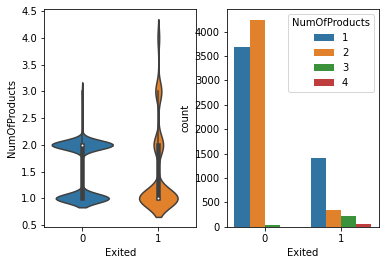

Number of observations in each category of HasCrCard :
1    7055
0    2945
Name: HasCrCard, dtype: int64


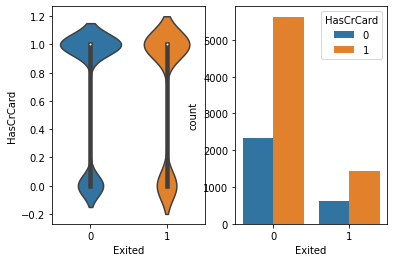

Number of observations in each category of IsActiveMember :
1    5151
0    4849
Name: IsActiveMember, dtype: int64


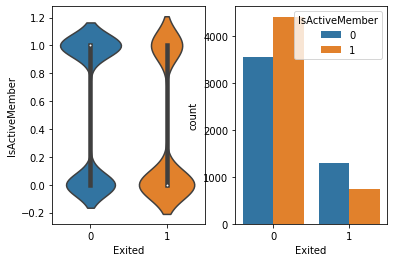

Number of observations in each category of Gender :
Male      5457
Female    4543
Name: Gender, dtype: int64


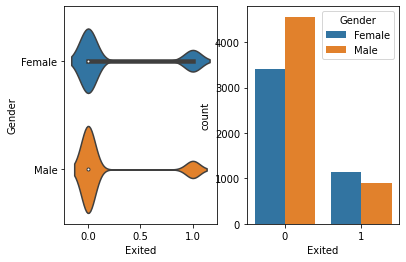

Number of observations in each category of Geography :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


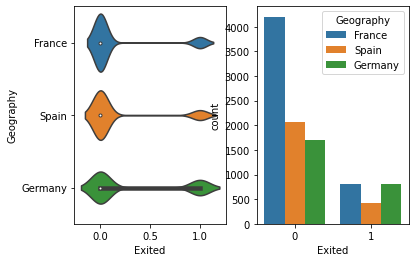

In [10]:
#EDA
for i,var in enumerate(cat_var,1):
    print(f'Number of observations in each category of {var} :\n{data[var].value_counts()}')
    plt.subplot(1,2,1)
    sns.violinplot(x='Exited',y=var,data=data)
    plt.subplot(1,2,2)
    sns.countplot(x='Exited',hue=var,data=data)
    plt.show()

When a customer is not an active member then they are likely to exit more.
Females are likely to exit more than males.
The percent of people in Germany 

In [11]:
#To find the number of observations in each class
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Exited = No is very high than Exited = Yes. Seems to have class imbalance.

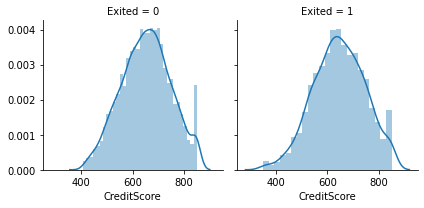

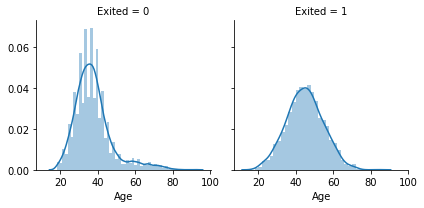

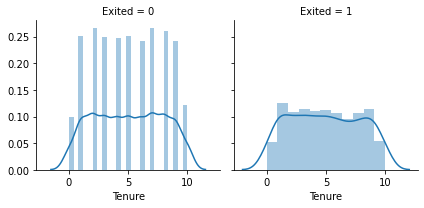

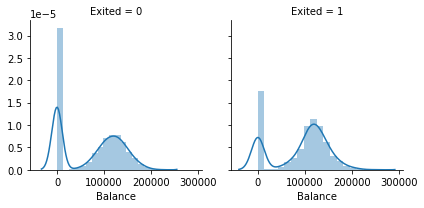

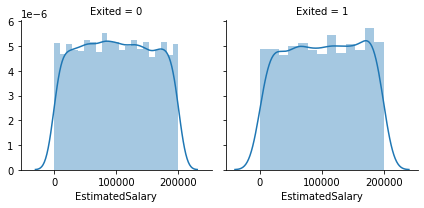

In [12]:
for i in num_var:
    g=sns.FacetGrid(data,col='Exited')
    g.map(sns.distplot,i)

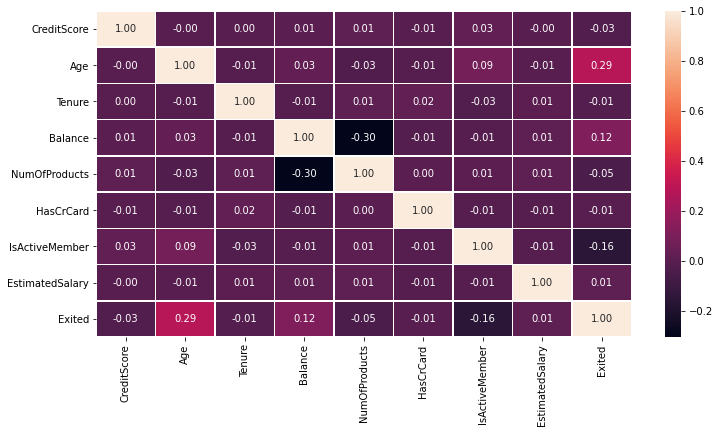

In [13]:
#Correlation
fig, ax = plt.subplots(figsize=(12,6)) 
sns.heatmap(data.corr(), annot = True, fmt = ".2f", linewidths=0.5, ax=ax) 
plt.show()

In [14]:
X=pd.get_dummies(data.drop(['Exited'],axis=1),drop_first=True)
y=data['Exited']
print(X[:5])
print(y[:5])

   CreditScore  Age  Tenure  ...  Geography_Germany  Geography_Spain  Gender_Male
0          619   42       2  ...                  0                0            0
1          608   41       1  ...                  0                1            0
2          502   42       8  ...                  0                0            0
3          699   39       1  ...                  0                0            0
4          850   43       2  ...                  0                1            0

[5 rows x 11 columns]
0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64


In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

In [16]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [17]:
lr=LogisticRegression(random_state=1309)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(classification_report(y_test,y_pred))
print(lr.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.58      0.24      0.34       405

    accuracy                           0.81      2000
   macro avg       0.71      0.60      0.61      2000
weighted avg       0.78      0.81      0.78      2000

0.811
[[1526   69]
 [ 309   96]]


In [18]:
lr=LogisticRegression(random_state=1309)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(classification_report(y_test,y_pred))
print(lr.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.58      0.24      0.34       405

    accuracy                           0.81      2000
   macro avg       0.71      0.60      0.61      2000
weighted avg       0.78      0.81      0.78      2000

0.811
[[1526   69]
 [ 309   96]]


Since the recall is very low need to do imbalanced data handling techniques

In [19]:
#Smote
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  

sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 


Before OverSampling, counts of label '1': 1632
Before OverSampling, counts of label '0': 6368 

After OverSampling, the shape of train_X: (12736, 11)
After OverSampling, the shape of train_y: (12736,) 

After OverSampling, counts of label '1': 6368
After OverSampling, counts of label '0': 6368


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [21]:
#Using Scaled features
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res) 
y_pred = lr1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, y_pred))
print(lr.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1595
           1       0.38      0.71      0.50       405

    accuracy                           0.71      2000
   macro avg       0.64      0.71      0.64      2000
weighted avg       0.80      0.71      0.73      2000

0.811
[[1123  472]
 [ 116  289]]


The Recall is now increased after upsampling the positive labels and fitting the model.

In [22]:
r=1309
models = [LogisticRegression(random_state=r),GaussianNB(), KNeighborsClassifier(),BaggingClassifier(random_state=r),DecisionTreeClassifier(random_state=r),
          RandomForestClassifier(random_state=r), GradientBoostingClassifier(random_state=r),
          MLPClassifier(random_state=r)]
names = ["LogisticRegression","GaussianNB","KNN","Bagging",
             "DecisionTree","Random_Forest","GBM","Art.Neural_Network"]

In [23]:
print('Default model validation accuracies for the train data:', end = "\n\n")
for name, model in zip(names, models):
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test) 
    print(name,':',"%.3f" % accuracy_score(y_pred, y_test))

Default model validation accuracies for the train data:

LogisticRegression : 0.706
GaussianNB : 0.726
KNN : 0.736
Bagging : 0.832
DecisionTree : 0.778
Random_Forest : 0.843
GBM : 0.826
Art.Neural_Network : 0.793


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [24]:
def model_report(model):
  model.fit(X_train_res,y_train_res)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(accuracy_score(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))

##Paramater Tuning

In [25]:
#Parameter tuning of Logistic Regression
lr=LogisticRegression()
logreg_params= {"C":np.logspace(-1, 1, 10),
                    "penalty": ["l1","l2"], "solver":['lbfgs', 'liblinear', 'sag', 'saga'], "max_iter":[1000]}
start_time = time.time()
clf = GridSearchCV(lr, param_grid=logreg_params, cv =5, scoring = "recall", n_jobs = -1,verbose = False)
clf.fit(X_train_res,y_train_res)
cv_result=clf.best_score_
lr_best_estimators=clf.best_estimator_
print('cross validation accuracy : %.3f'%cv_result)
print(lr_best_estimators)
print("--- %s seconds ---" % (time.time() - start_time))
model_report(lr_best_estimators)

cross validation accuracy : 0.704
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
--- 8.414132595062256 seconds ---
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1595
           1       0.38      0.72      0.50       405

    accuracy                           0.71      2000
   macro avg       0.64      0.71      0.64      2000
weighted avg       0.80      0.71      0.73      2000

0.7055
[[1121  474]
 [ 115  290]]


In [26]:
#Parameter Tuning for Naive Bayes
nb=GaussianNB()
NB_params = {'var_smoothing': np.logspace(0,-9, num=100)}
start_time = time.time()
clf = GridSearchCV(nb, param_grid=NB_params, cv =5, scoring = "recall", n_jobs = -1,verbose = False)
clf.fit(X_train_res,y_train_res)
cv_result=clf.best_score_
nb_best_estimators=clf.best_estimator_
print('cross validation accuracy : %.3f'%cv_result)
print(nb_best_estimators)
print("--- %s seconds ---" % (time.time() - start_time))
model_report(nb_best_estimators)

cross validation accuracy : 0.708
GaussianNB(priors=None, var_smoothing=0.0533669923120631)
--- 2.490081310272217 seconds ---
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1595
           1       0.40      0.74      0.52       405

    accuracy                           0.72      2000
   macro avg       0.66      0.73      0.66      2000
weighted avg       0.81      0.72      0.75      2000

0.7235
[[1148  447]
 [ 106  299]]


In [27]:
#Parameter Tuning for KNN
knn = KNeighborsClassifier()
knn_params= {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
start_time = time.time()
clf = GridSearchCV(knn, param_grid=knn_params, cv =5, scoring = "recall", n_jobs = -1,verbose = False)
clf.fit(X_train_res,y_train_res)
cv_result=clf.best_score_
knn_best_estimators=clf.best_estimator_
print('cross validation accuracy : %.3f'%cv_result)
print(knn_best_estimators)
print("--- %s seconds ---" % (time.time() - start_time))
model_report(knn_best_estimators)

cross validation accuracy : 0.976
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')
--- 54.48993134498596 seconds ---
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1595
           1       0.41      0.67      0.51       405

    accuracy                           0.74      2000
   macro avg       0.66      0.72      0.67      2000
weighted avg       0.80      0.74      0.76      2000

0.741
[[1210  385]
 [ 133  272]]


In [28]:
# Decision Tree model without tuning
dt =DecisionTreeClassifier()
dt.fit(X_train_res,y_train_res)
y_pred=dt.predict(X_test)
print("Accuracy:",dt.score(X_test,y_test))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.7745
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1595
           1       0.46      0.59      0.51       405

    accuracy                           0.77      2000
   macro avg       0.67      0.70      0.68      2000
weighted avg       0.80      0.77      0.78      2000

[[1312  283]
 [ 168  237]]


In [29]:
#Decision Tree parameter tuning
dtree_params = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}
start_time = time.time()
clf = GridSearchCV(dt, param_grid=dtree_params, cv =5, scoring = "recall", n_jobs = -1,verbose = False)
clf.fit(X_train_res,y_train_res)
cv_result=clf.best_score_
dt_best_estimators=clf.best_estimator_
print('cross validation accuracy : %.3f'%cv_result)
print(dt_best_estimators)
print("--- %s seconds ---" % (time.time() - start_time))
model_report(dt_best_estimators)

cross validation accuracy : 0.815
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
--- 30.440423011779785 seconds ---
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1595
           1       0.44      0.71      0.54       405

    accuracy                           0.76      2000
   macro avg       0.68      0.74      0.69      2000
weighted avg       0.82      0.76      0.78      2000

0.757
[[1227  368]
 [ 118  287]]


##Voting Classifier

In [30]:
estimators=[['Logistic', lr_best_estimators],['Naive Bayes', nb_best_estimators],['Nearest Neigbor',knn_best_estimators],["decision tree",dt_best_estimators]]
votingC = VotingClassifier(estimators = estimators, voting = "soft", n_jobs = -1)
model_report(votingC)
#votingC = votingC.fit(X_train_res, y_train_res)
#print(accuracy_score(votingC.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1595
           1       0.48      0.73      0.58       405

    accuracy                           0.79      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.79      0.80      2000

0.787
[[1278  317]
 [ 109  296]]


##Random Forest

In [31]:
#Random Forest without tuning
rf=RandomForestClassifier()
model_report(rf)
'''rf.fit(X_train_res,y_train_res)
y_pred=rf.predict(X_test)
print("Accuracy:",rf.score(X_test,y_test))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))'''

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1595
           1       0.61      0.65      0.63       405

    accuracy                           0.84      2000
   macro avg       0.76      0.77      0.76      2000
weighted avg       0.85      0.84      0.85      2000

0.8435
[[1424  171]
 [ 142  263]]


'rf.fit(X_train_res,y_train_res)\ny_pred=rf.predict(X_test)\nprint("Accuracy:",rf.score(X_test,y_test))\nprint(classification_report(y_test,y_pred))\nprint(confusion_matrix(y_test,y_pred))'

In [32]:
start_time = time.time()
rf_params = {"max_features": ["log2","auto","sqrt"],
                "min_samples_split":[2,3,5],"min_samples_leaf":[1,3,5],
                "bootstrap":[True,False],
                "n_estimators":[50,100,150],
                "criterion":["gini","entropy"]}
clf = GridSearchCV(rf, param_grid=rf_params, cv =5, scoring = "recall", n_jobs = -1,verbose = False)
clf.fit(X_train_res,y_train_res)
cv_result=clf.best_score_
rf_best_estimators=clf.best_estimator_
print('cross validation accuracy : %.3f'%cv_result)
print(rf_best_estimators)
#print("--- %s seconds ---" % (time.time() - start_time))
model_report(rf_best_estimators)

cross validation accuracy : 0.910
RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1595
           1       0.63      0.62      0.62       405

    accuracy                           0.85      2000
   macro avg       0.77      0.76      0.76      2000
weighted avg       0.85      0.85      0.85      2000

0.8485
[[1447  148]
 [ 155  250]]


Best parameters are max_features='log2',
                "min_samples_split":2,
                "min_samples_leaf":1,
                "bootstrap":False,
                "n_estimators":100,
                "criterion":"entropy"

In [33]:
#Trying for my data
my_data=np.array([732,24,2,3400,1,1,1,80000,0,0,0]).reshape(1,11)
my_data.shape
votingC.predict(my_data)

array([0])